## Deep Learning Course (980)
## Assignment One 

__Assignment Goals__:
- Start with TensorFlow (version 1.0).
- Implement and apply a multi-layer feed-forward neural network classifier.
- Understand the differences and trade-offs between linear regression, logistic regression, and multi-layer feed-forward neural network.

In this assignment, you will be asked to install TensorFlow and Jupyter Notebook. In addition, you will design a Multilayer feed-forward neural network to classify a Toy Dataset (Figure 1).

__DataSet__: dataset has 100 instances and two features. 

1. Install TensorFlow (1.15.0) and Jupyter Notebook. (15 points)
Run the provided code [Linear Regression](#linear_regression). This code uses linear regression and threshold classifier to classify the TOY [DataSet](#TOY_DataSet). Analyze the classifier result. The implemented regression code has a problem compared to [the linear regression model](http://cs229.stanford.edu/notes/cs229-notes1.pdf). Correct the code and describe the effect on classification accuracy. What is the reason for the change in accuracy? (10 points)
2. Using code similar to what was provided for linear regression, implement logistic regression.How does the result change. 
Hint: What is the correct loss function for logistic regression compared to linear regression? (20 points)
3. Implement a multi-layer feed-forward neural net and try to reach 100 accuracy (You are not allowed to use Keras and tf.nn and tf.losses for this part). Comapre regression model's capacity whith the multi layer. (20 points)
4. Use tf.keras to implement the exact graph that you Implemented in the section 3. (25 points)

__Submission Notes__:

Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in .pdf and .ipynb format. (10 points)
 
You can use visualize() helper function to visualize the model's decision boundary.

__Instructions__:

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your own writing or coding. You must not let other students copy your work. Spelling and grammar count.

Your assignments will be marked based on correctness, originality (the implementations and ideas are from yourself), clarification and test performance.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
#this line makes the notebook put the figures in-line rather than generate them in new windows

In [2]:
# helper functions

# helper function for geterating the data
def data_generator(N = 100,D = 2,K = 2):
    # N number of points per class; D dimensionality; k number of classes
    np.random.seed(0)
    X = np.zeros((N*K,D))
    y = np.zeros((N*K), dtype='uint8')
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    fig = plt.figure()
    plt.title('Figure 1: DataSet')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
   

    plt.xlim(X.min()-.5, X.max()+.5)
    plt.ylim(X.min()-.5, X.max()+.5)
    return X,y

# helper function for visualizing the boundaries
def visualize(sample, target, predict, se):
    """
    function for visualizing the classifier boundaries on the TOY dataset.

    @param sample: Training data features
    @param target: Target 
    @param predict: Model prediction
    @param se: The model's session
    """

    h = 0.02
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.round(se.run(predict,{X:(np.c_[xx.ravel(), yy.ravel()])}))
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


<a id='TOY_DataSet'></a>

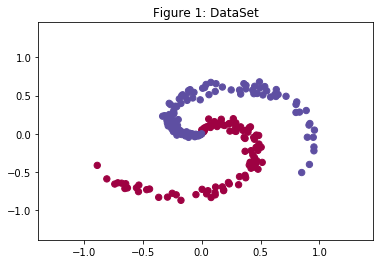

In [3]:
#  TOY DataSet
sample, target = data_generator()
# print(target.shape)

<a id='linear_regression'></a>

Epoch: 1 loss: 63.602 acc: 0.690
Epoch: 2 loss: 59.385 acc: 0.690
Epoch: 3 loss: 55.655 acc: 0.670
Epoch: 4 loss: 52.314 acc: 0.665
Epoch: 5 loss: 49.295 acc: 0.660
Epoch: 6 loss: 46.548 acc: 0.670
Epoch: 7 loss: 44.038 acc: 0.665
Epoch: 8 loss: 41.737 acc: 0.675
Epoch: 9 loss: 39.622 acc: 0.675
Epoch: 10 loss: 37.675 acc: 0.670
Epoch: 11 loss: 35.881 acc: 0.675
Epoch: 12 loss: 34.226 acc: 0.675
Epoch: 13 loss: 32.700 acc: 0.680
Epoch: 14 loss: 31.290 acc: 0.685
Epoch: 15 loss: 29.989 acc: 0.690
Epoch: 16 loss: 28.787 acc: 0.690
Epoch: 17 loss: 27.677 acc: 0.690
Epoch: 18 loss: 26.652 acc: 0.690
Epoch: 19 loss: 25.704 acc: 0.685
Epoch: 20 loss: 24.829 acc: 0.690
Epoch: 21 loss: 24.019 acc: 0.695
Epoch: 22 loss: 23.272 acc: 0.695
Epoch: 23 loss: 22.581 acc: 0.695
Epoch: 24 loss: 21.942 acc: 0.695
Epoch: 25 loss: 21.352 acc: 0.695
Epoch: 26 loss: 20.806 acc: 0.700
Epoch: 27 loss: 20.302 acc: 0.700
Epoch: 28 loss: 19.836 acc: 0.695
Epoch: 29 loss: 19.405 acc: 0.705
Epoch: 30 loss: 19.006 

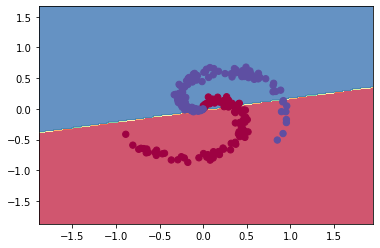

In [4]:
# linear regression
tf.set_random_seed(1)

# Almost-correct Linear Regression
X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

W = tf.Variable(tf.random_normal(shape=[2,1],seed=1))
b = tf.Variable(tf.random_normal(shape=[1],seed=1))

# first_layer = tf.matmul(X,W)
first_layer = tf.add(tf.matmul(X,W), b)

objective_function = tf.reduce_sum((tf.square(first_layer-Y)))/2

LR = tf.train.GradientDescentOptimizer(learning_rate=.001).minimize(objective_function)

# predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(first_layer,.5),tf.float32)

accu = tf.reduce_mean(tf.cast(tf.equal(predict,Y),tf.float32))

se = tf.Session()
se.run(tf.global_variables_initializer())

for i in range(100):
    se.run(LR,{X : sample,Y: target.reshape(-1,1)})
    #-1 is like "unspecified"
    
    print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(objective_function,{X:sample,Y:target.reshape(-1,1)})), "acc:", "{:.3f}".format(se.run(accu,{X:sample,Y:target.reshape(-1,1)})))
visualize(sample,target, predict,se)


1. In the lecture notes(http://cs229.stanford.edu/notes/cs229-notes1.pdf), it introduces the convention of letting x0 = 1, which means w0 is the bias parameter. However, the initial code didn't define this bias parameter. So I corrected the code by defining a bias parameter b and added it to y = XW (+ b).
The accuracy increased from 0.625 to 0.750 with learning rate = 0.001 and total epoches = 100. The reason why doing this will improve the accuracy is that the bias parameter provides offsets/shift to the prediction line. Without bias term, y = XW must go through zero which not always fit data well.

Epoch: 1 loss: 0.497 acc: 0.745
Epoch: 2 loss: 0.497 acc: 0.745
Epoch: 3 loss: 0.497 acc: 0.745
Epoch: 4 loss: 0.497 acc: 0.745
Epoch: 5 loss: 0.497 acc: 0.745
Epoch: 6 loss: 0.497 acc: 0.745
Epoch: 7 loss: 0.497 acc: 0.745
Epoch: 8 loss: 0.497 acc: 0.745
Epoch: 9 loss: 0.497 acc: 0.745
Epoch: 10 loss: 0.497 acc: 0.745
Epoch: 11 loss: 0.497 acc: 0.745
Epoch: 12 loss: 0.497 acc: 0.745
Epoch: 13 loss: 0.497 acc: 0.745
Epoch: 14 loss: 0.497 acc: 0.745
Epoch: 15 loss: 0.497 acc: 0.745
Epoch: 16 loss: 0.497 acc: 0.745
Epoch: 17 loss: 0.497 acc: 0.745
Epoch: 18 loss: 0.497 acc: 0.745
Epoch: 19 loss: 0.497 acc: 0.745
Epoch: 20 loss: 0.497 acc: 0.745
Epoch: 21 loss: 0.497 acc: 0.745
Epoch: 22 loss: 0.497 acc: 0.745
Epoch: 23 loss: 0.497 acc: 0.745
Epoch: 24 loss: 0.497 acc: 0.745
Epoch: 25 loss: 0.497 acc: 0.745
Epoch: 26 loss: 0.497 acc: 0.745
Epoch: 27 loss: 0.497 acc: 0.745
Epoch: 28 loss: 0.497 acc: 0.745
Epoch: 29 loss: 0.497 acc: 0.745
Epoch: 30 loss: 0.497 acc: 0.745
Epoch: 31 loss: 0.4

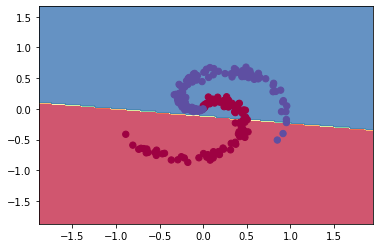

In [5]:
#  logistic regression
tf.set_random_seed(1)

X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

W = tf.Variable(tf.random_normal(shape=[2,1],seed=1))
b = tf.Variable(tf.random_normal(shape=[1],seed=1))

first_layer = tf.sigmoid(tf.add(tf.matmul(X, W), b)) 

# Sigmoid Cross Entropy Cost Function 
# objective_function = tf.nn.sigmoid_cross_entropy_with_logits(logits = first_layer, labels = Y) 
objective_function = -tf.reduce_mean(Y * tf.log(first_layer)+(1-Y)*tf.log(1-first_layer))
    
LR = tf.train.GradientDescentOptimizer(learning_rate=.001).minimize(objective_function)

# predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(first_layer,.5),tf.float32)
accu = tf.reduce_mean(tf.cast(tf.equal(predict,Y),tf.float32))

se = tf.Session()
se.run(tf.global_variables_initializer())

for i in range(100):
    se.run(LR,{X : sample,Y: target.reshape(-1,1)})
    #-1 is like "unspecified"
    print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(objective_function,{X:sample,Y:target.reshape(-1,1)})), "acc:", "{:.3f}".format(se.run(accu,{X:sample,Y:target.reshape(-1,1)})))
visualize(sample,target, predict,se)

2. The logistic regression result accuracy at epoch 100 is 0.750, the linear regression accuracy at epoch 100 is 0.750. The two results have similar accuracy althought the separate line are different.

Epoch: 1 loss: 263.700 acc: 0.500
Epoch: 100 loss: 14.012 acc: 0.710
Epoch: 200 loss: 13.377 acc: 0.755
Epoch: 300 loss: 13.001 acc: 0.755
Epoch: 400 loss: 12.432 acc: 0.760
Epoch: 500 loss: 11.383 acc: 0.820
Epoch: 600 loss: 9.839 acc: 0.885
Epoch: 700 loss: 10.042 acc: 0.870
Epoch: 800 loss: 8.045 acc: 0.905
Epoch: 900 loss: 7.634 acc: 0.920
Epoch: 1000 loss: 7.400 acc: 0.920
Epoch: 1100 loss: 7.206 acc: 0.920
Epoch: 1200 loss: 7.028 acc: 0.920
Epoch: 1300 loss: 6.857 acc: 0.920
Epoch: 1400 loss: 6.689 acc: 0.920
Epoch: 1500 loss: 6.524 acc: 0.920
Epoch: 1600 loss: 6.365 acc: 0.930
Epoch: 1700 loss: 6.280 acc: 0.930
Epoch: 1800 loss: 6.120 acc: 0.930
Epoch: 1900 loss: 5.967 acc: 0.935
Epoch: 2000 loss: 5.958 acc: 0.945
Epoch: 2100 loss: 5.731 acc: 0.935
Epoch: 2200 loss: 6.724 acc: 0.900
Epoch: 2300 loss: 5.495 acc: 0.940
Epoch: 2400 loss: 5.386 acc: 0.945
Epoch: 2500 loss: 5.325 acc: 0.950
Epoch: 2600 loss: 5.132 acc: 0.950
Epoch: 2700 loss: 5.384 acc: 0.950
Epoch: 2800 loss: 4.932 

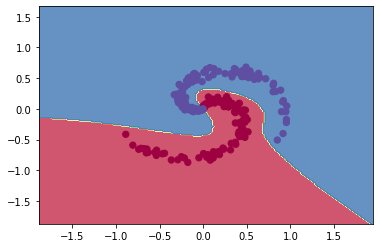

In [12]:
# NN
tf.set_random_seed(1)

X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

# Network Parameters
n_hidden_1 = 8
n_hidden_2 = 4

W = {
    'h1': tf.Variable(tf.random_normal([2, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, 1]))
}

b = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([1]))
}

def net(x):
    layer_1 = tf.sigmoid(tf.add(tf.matmul(x, W['h1']), b['b1']))
    layer_2 = tf.sigmoid(tf.add(tf.matmul(layer_1, W['h2']), b['b2']))
    out_layer = tf.matmul(layer_2, W['out']) + b['out']
    return out_layer

logits = net(X)
predict = tf.nn.softmax(logits)

objective_function = tf.reduce_sum((tf.square(logits-Y)))/2
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.005).minimize(objective_function)
# optimizer = tf.train.AdamOptimizer(learning_rate=.001).minimize(objective_function)

## predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(logits,.5),tf.float32)
accu = tf.reduce_mean(tf.cast(tf.equal(predict,Y),tf.float32))

se = tf.Session()
se.run(tf.global_variables_initializer())

num_steps = 20000
display_step = 100

for i in range(1, num_steps+1):
    se.run(optimizer,{X : sample,Y: target.reshape(-1,1)})
    #-1 is like "unspecified"
    loss, acc = se.run([objective_function, accu],{X:sample,Y:target.reshape(-1,1)})
    if i % display_step == 0 or i == 1:
        print("Epoch:", i,"loss:", "{:.3f}".format(loss), "acc:", "{:.3f}".format(acc))
visualize(sample,target, predict,se)

3. With multi-layerregress model, we are able to achieve a better accuracy as more parameters to be trained and tuned. The separate line is capable to be curved (nonlinearly) in training to get a good result.

In [7]:
# Use tf.keras to implement the question 3
tf.set_random_seed(1)

X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, input_dim = 2, activation='sigmoid'),
  tf.keras.layers.Dense(4, activation='sigmoid'),
  tf.keras.layers.Dense(1)
])

sgd = tf.keras.optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.0, nesterov=True)
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

se = tf.Session()
se.run(tf.global_variables_initializer())
num_steps = 20000
display_step = 100
history = model.fit(sample, target.reshape(-1,1), batch_size = len(sample), epochs=num_steps, verbose=0)

for i in range(0, num_steps):
    if (i+1) % display_step == 0 or (i+1) == 1:
        print("Epoch:", i+1,"loss:", "{:.3f}".format(history.history['loss'][i]), "acc:", "{:.3f}".format(history.history['acc'][i]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch: 1 loss: 0.262 acc: 0.315
Epoch: 100 loss: 0.260 acc: 0.285
Epoch: 200 loss: 0.257 acc: 0.300
Epoch: 300 loss: 0.255 acc: 0.315
Epoch: 400 loss: 0.253 acc: 0.360
Epoch: 500 loss: 0.251 acc: 0.415
Epoch: 600 loss: 0.249 acc: 0.505
Epoch: 700 loss: 0.248 acc: 0.595
Epoch: 800 loss: 0.246 acc: 0.650
Epoch: 900 loss: 0.244 acc: 0.680
Epoch: 1000 loss: 0.242 acc: 0.675
Epoch: 1100 loss: 0.240 acc: 0.685
Epoch: 1200 loss: 0.238 acc: 0.690
Epoch: 1300 loss: 0.237 acc: 0.700
Epoch: 1400 loss: 0.235 acc: 0.700
Epoch: 1500 loss: 0.233 acc: 0.690
Epoch: 1600 loss: 0.231 acc: 0.685
Epoch: 1700 loss: 0.229 acc: 0.690
Epoch: 1800 loss: 0.227 acc: 0.700
Epoch: 1900 loss: 0.225 acc: 0.700
Epoch: 2000 loss: 0.223 acc: 0.700
Epoch: 2100 loss: 0.221 acc: 0.705
Epoch: 2200 loss: 0.219 acc: 0.700
Epoch: 2300 loss: 0.217 acc: 0.700
Epoch: 2400 loss: 0.215 acc: 0.695
Epoch: 2500 loss: 0.213 acc: 0.705
Epoch: 2600 loss: 0.2